In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [88]:
path=r"C:\Users\SIDHESH\Desktop\ACADMICS\MACHINE LEARNING STUFF\PROJECTS\Computer Vision\eKYC system\Final\IMAGES\sani_aadhar.jpg"
img_gray=cv2.imread(path,0)

In [89]:
img_rgb=cv2.imread(path)
img_rgb=cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)

In [90]:
def binary_thresh(img):
    ret, img_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    return img_thresh

In [91]:
img_thresh=binary_thresh(img_gray)

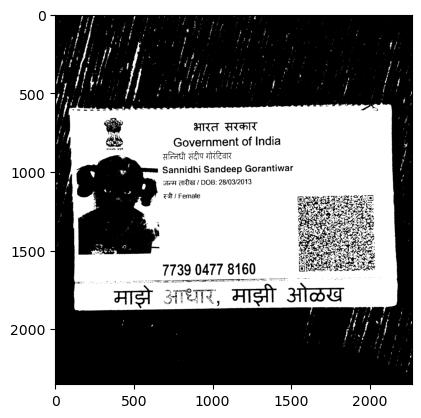

In [92]:
plt.imshow(img_thresh,cmap='gray')

In [100]:

def draw_contours(img_thresh):
    global img_gray
    img_cropped = img_gray.copy()
    
    # Find contours
    contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    external_contours = np.zeros(img_thresh.shape, dtype=np.uint8)

    # Find the largest external contour
    max_contour_area = 0
    largest_contour_index = -1
    
    for i in range(len(contours)):
        if hierarchy[0][i][3] == -1:  # Check if it's an external contour
            contour_area = cv2.contourArea(contours[i])
            if contour_area > max_contour_area:
                max_contour_area = contour_area
                largest_contour_index = i
    
    # Draw the largest external contour if found
    if largest_contour_index != -1:
        cv2.drawContours(external_contours, contours, largest_contour_index, 255, -1)
        
        # Get the bounding rectangle of the largest contour
        x, y, w, h = cv2.boundingRect(contours[largest_contour_index])
        cv2.rectangle(img_cropped, (x, y), (x + w, y + h), (0, 255, 0), 20)
        
        return (x, y, w, h)
    else:
        return None


In [101]:
x,y,w,h=draw_contours(img_thresh)

In [102]:
copy=img_rgb.copy()
cv2.rectangle(copy,(x,y),(x+w,y+h),(0,255,0),20)


array([[[100,  93,  87],
        [103,  96,  90],
        [106, 102,  93],
        ...,
        [127, 115,  93],
        [126, 115,  93],
        [126, 115,  93]],

       [[106,  99,  93],
        [106,  99,  93],
        [105, 101,  92],
        ...,
        [128, 116,  94],
        [126, 115,  93],
        [125, 114,  92]],

       [[108, 103,  97],
        [107, 102,  96],
        [106, 101,  95],
        ...,
        [124, 113,  91],
        [123, 112,  90],
        [121, 110,  88]],

       ...,

       [[110,  72,  59],
        [109,  71,  58],
        [104,  68,  56],
        ...,
        [ 94, 100,  86],
        [ 91,  97,  83],
        [ 90,  96,  82]],

       [[113,  75,  62],
        [107,  71,  57],
        [ 99,  63,  51],
        ...,
        [ 92,  98,  84],
        [ 90,  96,  82],
        [ 89,  95,  81]],

       [[114,  76,  63],
        [108,  72,  58],
        [ 99,  63,  51],
        ...,
        [ 92,  98,  84],
        [ 91,  97,  83],
        [ 91,  97,  83]]

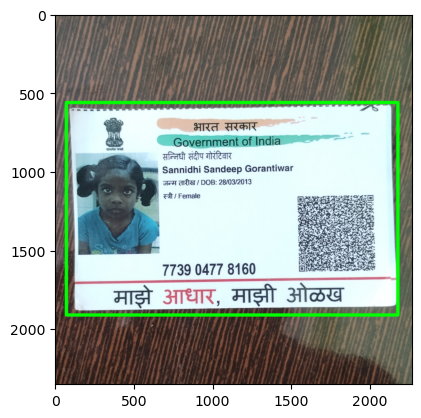

In [103]:
plt.imshow(copy)

In [104]:
def crop(img_rgb,x,y,w,h):
    roi=img_rgb[y:y+h,x:x+w]
    return roi

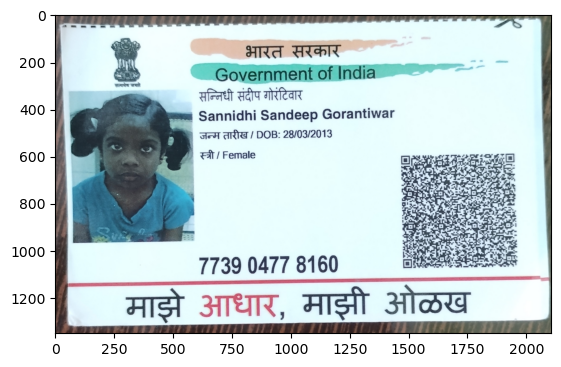

In [105]:
sorted_card=crop(img_rgb,x,y,w,h)
plt.imshow(sorted_card)

In [107]:
to_export=sorted_card.copy()
to_export=cv2.cvtColor(to_export,cv2.COLOR_RGB2BGR)
cv2.imwrite("Aadhar_Sorted.jpg",to_export)

True